[Color Wheel](https://www.sessions.edu/color-calculator/)

<span style="color:yellow"> The term <span style="color:magenta"><strong>cases</strong></span> will be used to indicate all types of cases i.e. <strong>Confirmed, Death and Recovered</strong>.<br>In case of a specific type of case, the type will be mentioned explicitly.</span>
### DATA TO BE REPRESENTED:-
1. Number of cases on a given day:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1000 cases etc.
    4. Sorting in a partcular order.
2. Number of cases in span of some days:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1 Lac cases etc.
    4. Sorting in a partcular order.
3. Displaying cases on a map:-
    1. Entire world map.
    2. A particular country / region.
    3. Displaying regions with some threshold number of cases i.e. > 1 Lac cases etc.
    4. Types of cases differentiated based on colors.
    5. Types of cases differentiated based on range of cases i.e. 0 - 10000, 10000 - 1 lac etc.
4. Think of different types of graphs that can be used:-
    1. Line graphs
    2. Scatter plots.
    3. Pie charts.
    4. World maps.
5. A race among the countries based on the number of active covid cases. (Horizontal bar charts)
6. Current  / Live data of countries / regions.
7. Give short summarized forms of covid articles.
8. Provide relevant covid research papers.

## IMPORTING DEPENDENCIES

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import geopandas as gpd
import folium as fl
%matplotlib inline

In [20]:
mp.style.use('fivethirtyeight')
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 50)

## COVID DATA URLS

#### IMPORTING DATA

In [3]:
def create_data(urls):
    types = ['Confirmed', 'Death', 'Recovered']
    data = []
    for url, type_of_case in zip(urls, types):
        raw_data = pd.read_csv(url)
        melted_data = pd.melt(raw_data,
                              id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                              var_name = 'Date',
                              value_name = type_of_case)
        data.append(melted_data)
    final_data = data[0].join(data[1]['Death']).join(data[2]['Recovered'])
    return final_data

In [4]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
covid_data = create_data([confirmed_url, deaths_url, recovered_url])
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data_by_date = covid_data.groupby('Date').sum()

In [6]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.000000
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.000000
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.000000
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.000000
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.000000


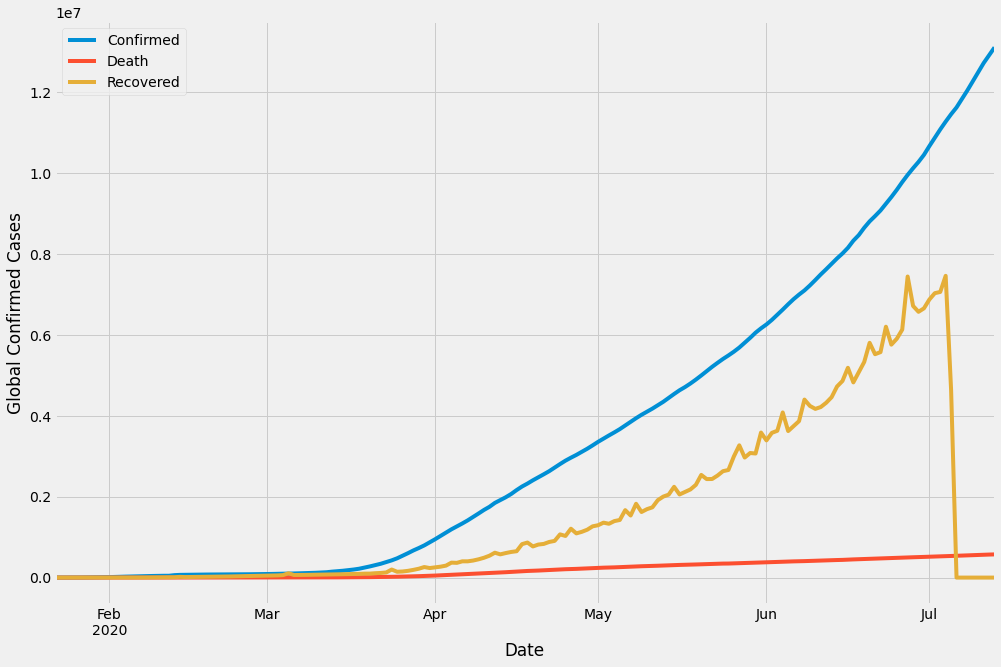

In [7]:
mp.figure(figsize = (15, 10))
mp.ylabel('Global Confirmed Cases')
mp.xlabel('Date')
covid_data_by_date['Confirmed'].plot()
covid_data_by_date['Death'].plot()
covid_data_by_date['Recovered'].plot()
mp.legend()

In [23]:
covid_data_by_date.head(6)

,Lat,Long,Confirmed,Death,Recovered
Date,,,,,
2020-01-22,5625.379563,5995.278262,555,17,28.000000
2020-01-23,5625.379563,5995.278262,654,18,30.000000
2020-01-24,5625.379563,5995.278262,941,26,36.000000
2020-01-25,5625.379563,5995.278262,1434,42,43.000000
2020-01-26,5625.379563,5995.278262,2118,56,102.000000
2020-01-27,5625.379563,5995.278262,2927,82,108.000000


### CASES ON A GIVEN DATE GLOBALLY

In [17]:
given_date = '7/2/20'
covid_data_by_date.loc[given_date, 'Confirmed']

10871926.0

In [95]:
given_date = '7/2/20'
int(covid_data_by_date.loc[given_date, 'Confirmed'])

10871926

### CASES ON A GIVEN DATE COUNTRY WISE
<span style="color:yellow">Originally the plan was to display all the data but the huge number of country/regions made it hard to present the data perfectly. <br>Thus the representation was changed to displaying only top and bottom 10 country/regions</span>

In [129]:
def num_cases_on_a_given_date_country_wise(data, given_date, type_of_case, ascending=False, num_countries = 10):
    data_grouped_by_date_and_country = data.groupby(['Date', 'Country/Region']).sum()
    data_on_a_date_country_wise = data_grouped_by_date_and_country.loc[given_date, :]
    data_on_a_date_country_wise = \
        data_on_a_date_country_wise.sort_values(by = type_of_case,
                                                ascending = ascending)[:min(num_countries, len(data_on_a_date_country_wise))]
    countries = data_on_a_date_country_wise.reset_index()['Country/Region']
    case_counts = data_on_a_date_country_wise[type_of_case]
    colour = '#03dffc' if type_of_case == 'Confirmed' else ('#fc8803' if type_of_case == 'Recovered' else '#fc0b03')
#     colour = '#fc8803' if type_of_case == 'Recovered'
#     colour = '#fc0b03' if type_of_case == 'Death'
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.bar(countries, case_counts, color = colour)
    mp.ylabel(f'{type_of_case} Cases', fontsize = 15)
    mp.xlabel('Countries', fontsize = 15)
    mp.title(f'Number of {type_of_case} Cases on {given_date}', fontsize = 15)
    mp.tight_layout()
    mp.yticks([i for i in range(0, int(max(case_counts)) + 1000, int(max(case_counts) / 5))])
    for index, data in enumerate(case_counts):
        mp.text(x = index - 0.35, y = data+0.5, s = f'{data}', fontdict = dict(fontsize = 13))

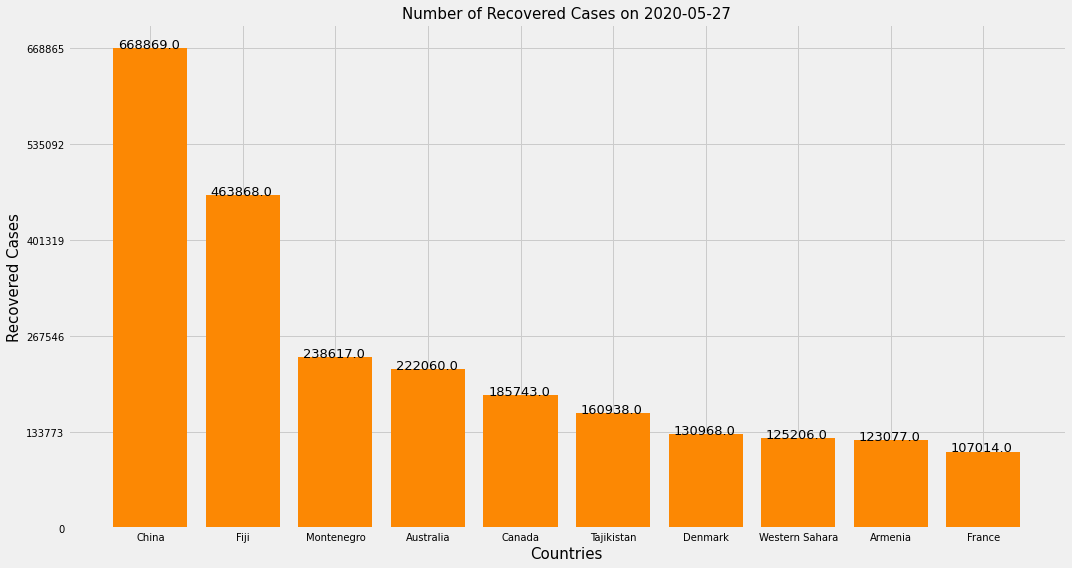

In [130]:
num_cases_on_a_given_date_country_wise(covid_data, '2020-05-27', 'Recovered', ascending = False)

### CASES ON A GIVEN DATE COUNTRYWISE BASED ON A THRESHOLD

In [83]:
def num_cases_on_a_given_date_country_wise_with_threshold(data, given_date, type_of_case, ascending=False, num_countries = 10, threshold = 0):
    data_grouped_by_date_and_country = data.groupby(['Date', 'Country/Region']).sum()
    
    data_on_a_date_country_wise = data_grouped_by_date_and_country.loc[given_date, :]
    filt = data_on_a_date_country_wise[type_of_case] >= threshold
    data_on_a_date_country_wise = data_on_a_date_country_wise[filt]
    data_on_a_date_country_wise = \
        data_on_a_date_country_wise.sort_values(by = type_of_case,
                                                ascending = ascending)[:min(num_countries, len(data_on_a_date_country_wise))]
    countries = data_on_a_date_country_wise.reset_index()['Country/Region']
    case_counts = data_on_a_date_country_wise[type_of_case]
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.bar(countries, case_counts, color = '#03dffc')
    mp.ylabel(f'{type_of_case} Cases', fontsize = 15)
    mp.xlabel('Countries', fontsize = 15)
    mp.title(f'Number of {type_of_case} Cases on {given_date}', fontsize = 15)
    mp.tight_layout()
    mp.yticks([i for i in range(0, max(case_counts) + 1000, 500000)])
#     mp.xticks([i for i in range(0, max(case_counts)+1000, 10000)])
    for index, data in enumerate(case_counts):
        mp.text(x = index - 0.35, y = data, s = f'{data}', fontdict = dict(fontsize = 13))

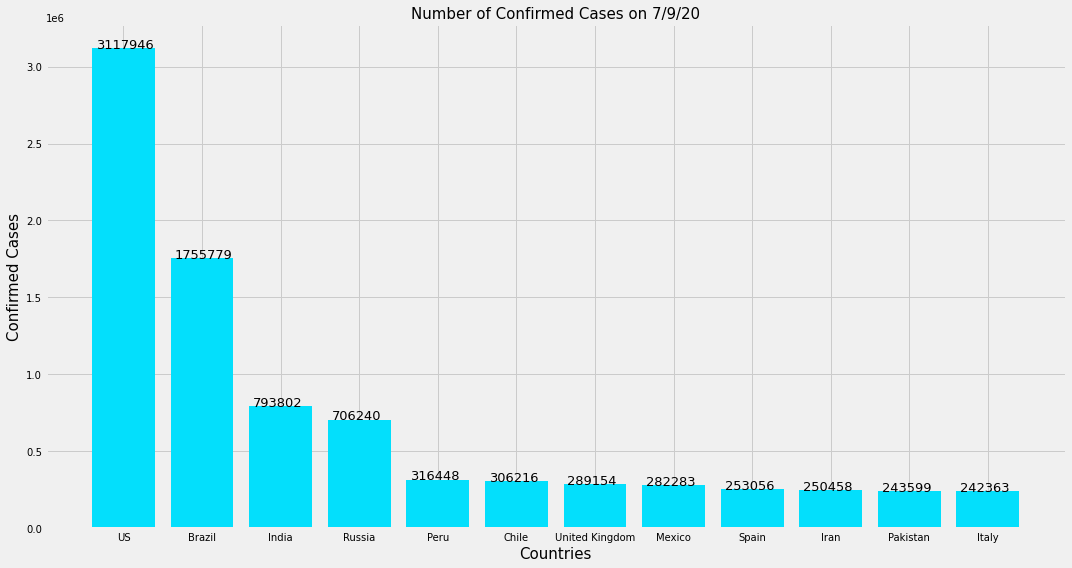

In [84]:
num_cases_on_a_given_date_country_wise_with_threshold(covid_data, '7/9/20', 'Confirmed',num_countries = 12, ascending = False, threshold = 500)

### NUMBER OF CASES IN A SPAN OF DAYS
#### NUMBER OF CASES GLOBALLY

In [85]:
def cases_in_a_span_of_days(covid_data, date, time_delta):
    from datetime import timedelta, datetime
    str_to_date = datetime.strptime(date, '%m/%d/%y')
    str_to_new_date = str_to_date + timedelta(time_delta)
    new_date = (str_to_new_date).strftime('%#m/%#d/%Y')
    data = covid_data.loc[date:new_date]
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.plot(data['Confirmed'], marker = '.', markersize = 15)
    mp.plot(data['Death'], marker = '.', markersize = 15)
    mp.plot(data['Recovered'], marker = '.', markersize = 15)
    mp.xlabel('Dates')
    mp.ylabel('Cases')
    mp.xticks(rotation = 90)
    mp.legend(['Confirmed', 'Death', 'Recovered'])
    mp.show()
#     print(date, new_date)
#     print(data)

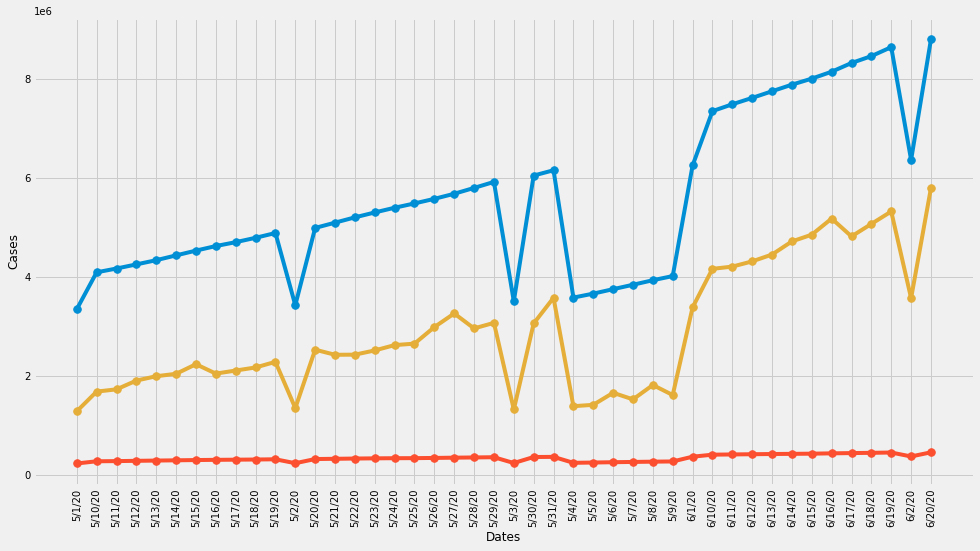

In [57]:
cases_in_a_span_of_days(covid_data_by_date, '5/1/20', 50)

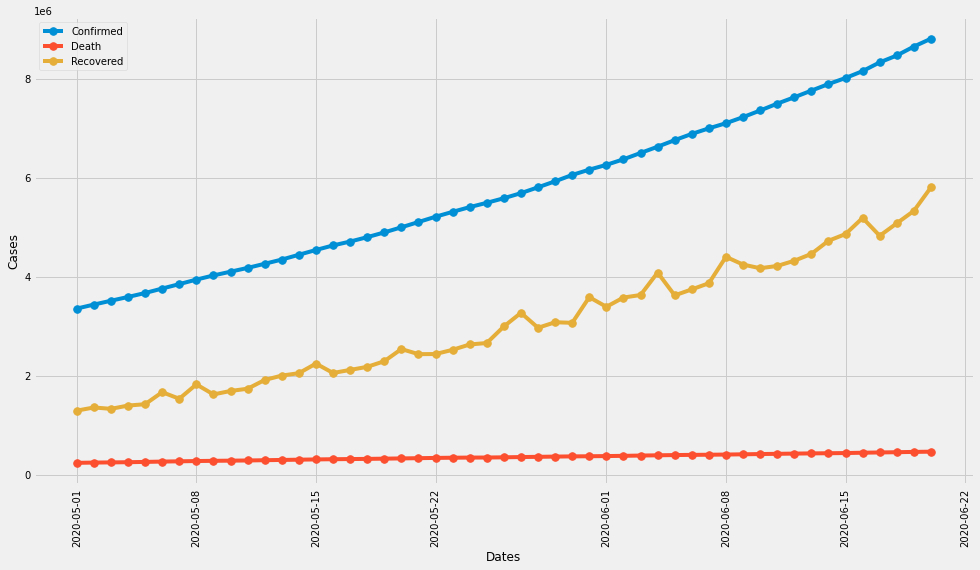

In [86]:
cases_in_a_span_of_days(covid_data_by_date, '5/1/20', 50)

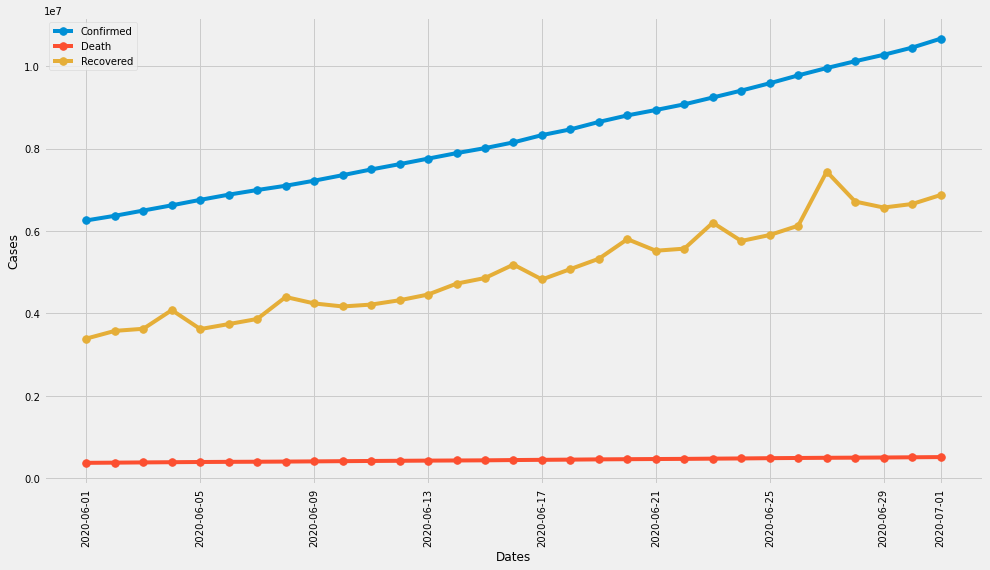

In [87]:
cases_in_a_span_of_days(covid_data_by_date, '6/1/20', 30)

### MAP

In [ ]:
def country_maps(country, )

In [143]:
gpd1 = gpd.GeoDataFrame(covid_data, geometry = gpd.points_from_xy(covid_data['Long'], covid_data['Lat']))

In [145]:
type(gpd1)

geopandas.geodataframe.GeoDataFrame

In [138]:
from shapely.geometry import Point, Polygon

In [139]:
points = [Point(x, y) for x, y in zip(covid_data.Long, covid_data.Lat)]

In [147]:
gpd2 = gpd.GeoDataFrame(covid_data, geometry = points)

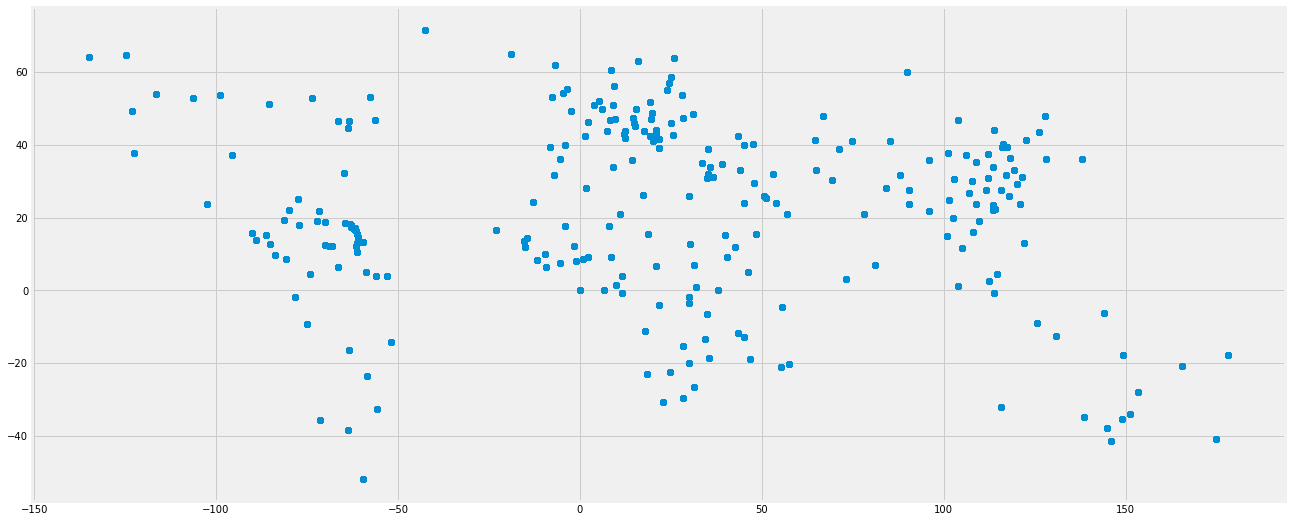

In [148]:
gpd2.plot(figsize = (20, 10))

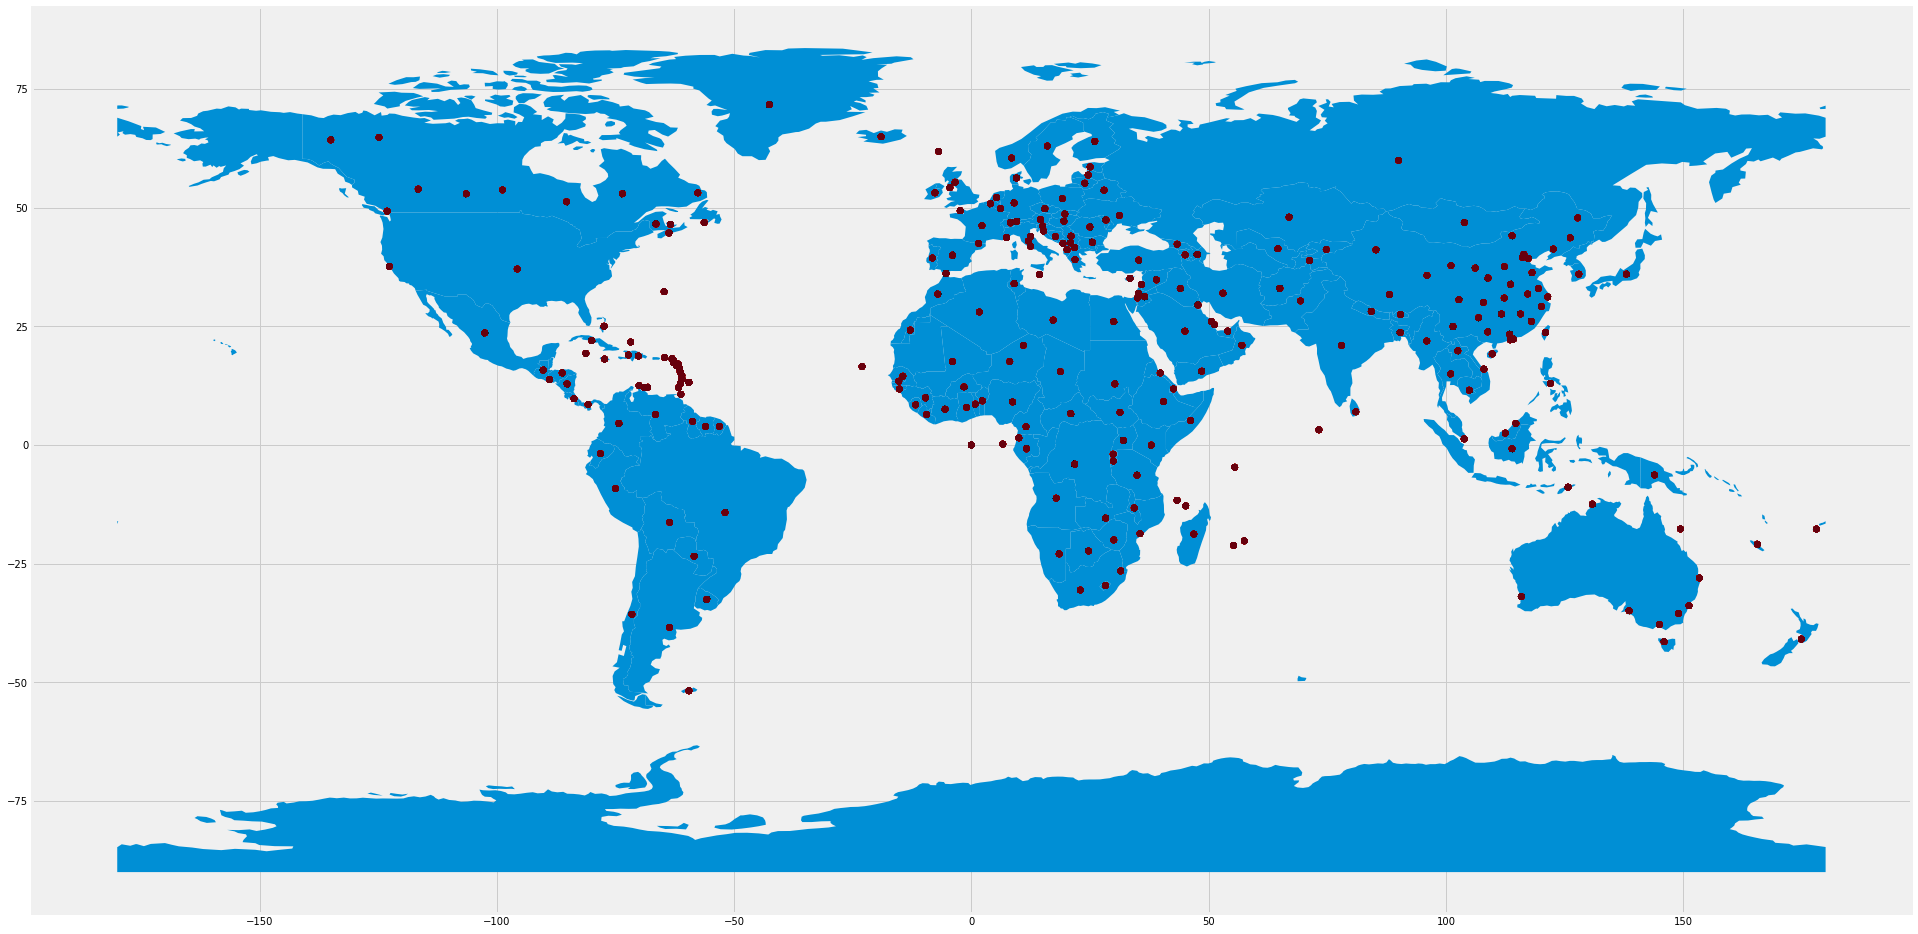

In [154]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize = (30, 20))
gpd2.plot(cmap='Reds', ax= ax)
# ax.axis('off')

In [155]:
india = world[]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.000000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.000000,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.500000,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.000000,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.000000,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.000000,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.000000,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.000000,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.000000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
